In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_datareader as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import yfinance as yf
import os
import warnings
warnings.filterwarnings('ignore')

In [14]:
start='2010-01-01'
end='2019-12-31'
stock_symbol='AAPL'
df=yf.download(stock_symbol, start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095581,144114400


In [24]:
df.head()

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [25]:
df=df.drop(['level_0'], axis=1)

In [26]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [29]:
df.drop(['index'], axis=1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000


In [30]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [31]:
df=df.drop(['index'],axis=1)

In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


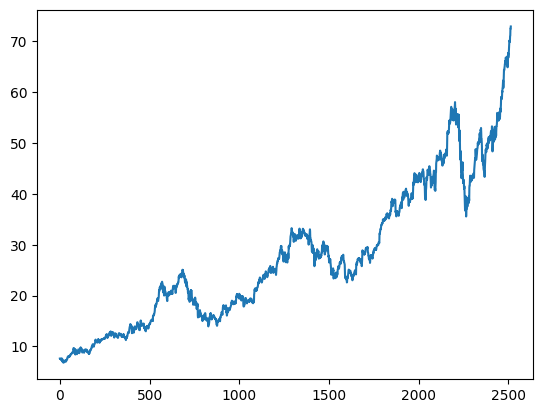

In [33]:
plt.plot(df.Close)

In [34]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000


In [46]:
df.drop(['Adj Close'], axis=1)

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,146266000


In [55]:
ma100=df.Close.rolling(100).mean()

In [56]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

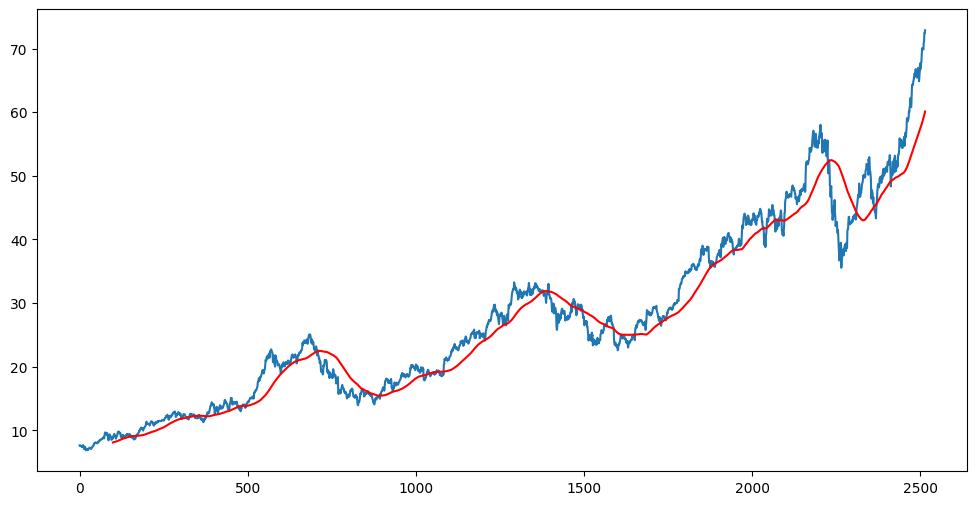

In [57]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [58]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

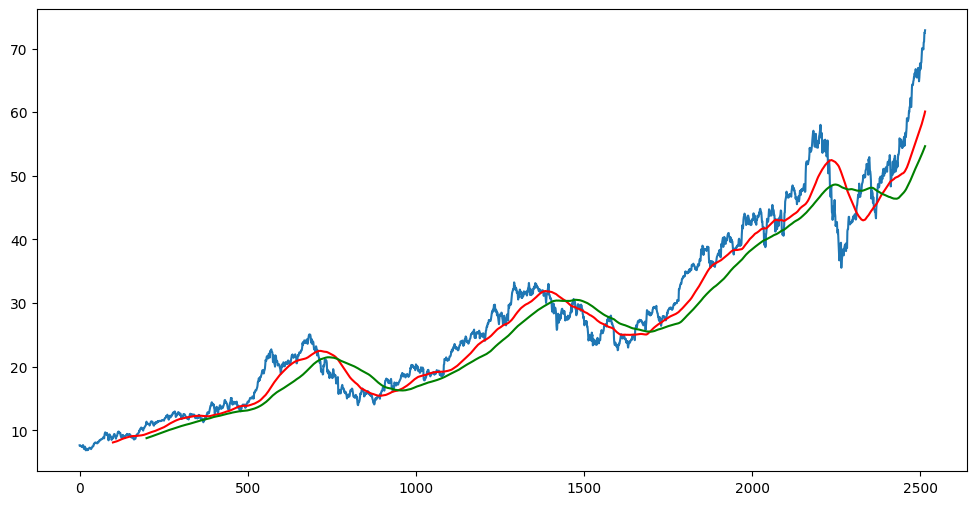

In [59]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [42]:
df.shape

(2515, 7)

In [53]:
df=df.drop(['Date', 'Adj Close'], axis=1)

In [54]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [60]:
df.shape

(2515, 5)

In [97]:
#spliting the datainto training and teesting
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing)

(1760, 1)
          Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500
...         ...
2510  71.000000
2511  71.067497
2512  72.477501
2513  72.449997
2514  72.879997

[755 rows x 1 columns]


In [63]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [64]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler=MinMaxScaler(feature_range=(0,1))

In [68]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [71]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [72]:
#ML model

In [75]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [85]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [89]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 13s 176ms/step - loss: 0.0869
Epoch 2/50
52/52 [==============================] - 10s 185ms/step - loss: 0.0149
Epoch 3/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0122
Epoch 4/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0115
Epoch 5/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0103
Epoch 6/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0094
Epoch 7/50
52/52 [==============================] - 12s 233ms/step - loss: 0.0097
Epoch 8/50
52/52 [==============================] - 12s 239ms/step - loss: 0.0090
Epoch 9/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0086
Epoch 10/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0086
Epoch 11/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0078
Epoch 13/50
5

In [92]:
model.save('keras_model1.h5')

In [93]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [94]:
past_100_days=data_training.tail(100)

In [100]:
final_df=pd.concat([past_100_days, data_testing], ignore_index=True)

In [101]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [103]:
input_data=scaler.fit_transform(final_df)

In [104]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [105]:
input_data.shape

(855, 1)

In [106]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [107]:
x_test, y_test=np.array(x_test), np.array(y_test)

In [108]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [109]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 3s 100ms/step


In [110]:
y_predicted.shape

(755, 1)

In [111]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [112]:
y_predicted

array([[0.1392194 ],
       [0.14041278],
       [0.14152336],
       [0.14252418],
       [0.14339569],
       [0.1441296 ],
       [0.1447357 ],
       [0.14524019],
       [0.14567399],
       [0.14606896],
       [0.14644843],
       [0.14682367],
       [0.14720538],
       [0.14760208],
       [0.14801495],
       [0.14844194],
       [0.1488795 ],
       [0.1493212 ],
       [0.14977409],
       [0.15025134],
       [0.15074916],
       [0.15127452],
       [0.1518241 ],
       [0.15244363],
       [0.15319367],
       [0.15408432],
       [0.15516868],
       [0.15649724],
       [0.15810764],
       [0.15999657],
       [0.16215935],
       [0.16458976],
       [0.16728002],
       [0.1702203 ],
       [0.17338762],
       [0.17673473],
       [0.18018448],
       [0.18370327],
       [0.18726106],
       [0.1908171 ],
       [0.19432692],
       [0.1977465 ],
       [0.20104302],
       [0.20419031],
       [0.20716926],
       [0.20996645],
       [0.21257181],
       [0.214

In [113]:
scaler.scale_

array([0.02123255])

In [114]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

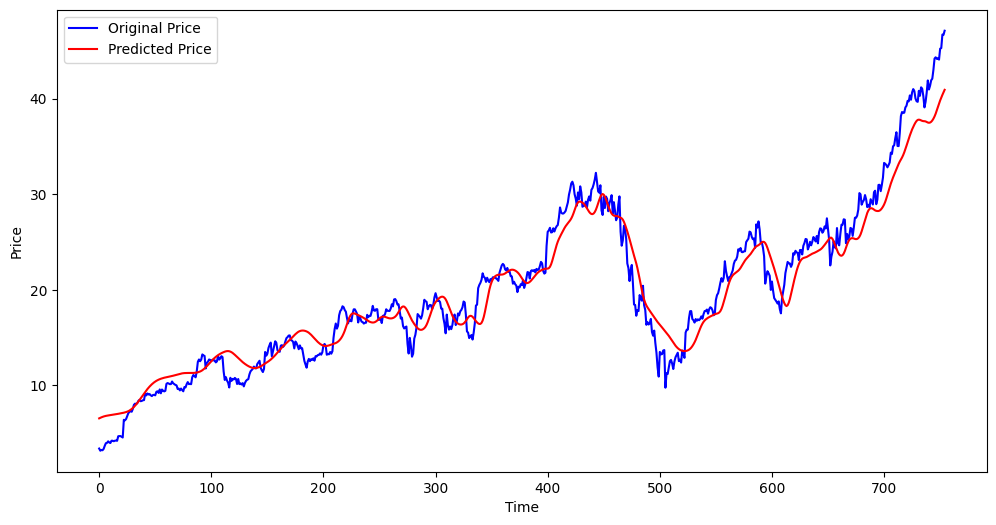

In [115]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()